## 1. Data Inventory

### 1.1 Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Read the csv files and quick browse

In [ ]:
import pandas as pd, os, glob

data_dir = '/content/drive/MyDrive/ucla_capstone'
ira_accts = pd.read_csv(os.path.join(data_dir, 'ira_accounts.csv'))
ira_txn = pd.read_csv(os.path.join(data_dir, 'ira_transactions.csv'))

for name, df in [('accounts', ira_accts), ('transactions', ira_txn)]:
    print(f'\n===== IRA {name.upper()} =====')
    display(df.head(3))
    df.info()
    print(df.describe(include='all').T[['count','unique','min','max']].head())


===== IRA ACCOUNTS =====


,accountId,accountNumberDisplay,accountType,balanceType,currency,description,nickname,productName,status
0,2000000000,*****0000,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
1,2000000001,*****0001,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000001,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
2,2000000002,*****0002,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000002,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   accountId             100 non-null    int64 
 1   accountNumberDisplay  100 non-null    object
 2   accountType           100 non-null    object
 3   balanceType           100 non-null    object
 4   currency              100 non-null    object
 5   description           100 non-null    object
 6   nickname              100 non-null    object
 7   productName           100 non-null    object
 8   status                100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB
                      count unique           min           max
accountId             100.0    NaN  2000000000.0  2000000099.0
accountNumberDisplay    100    100           NaN           NaN
accountType             100      1           NaN           NaN
balanceType             100      1           

,accountId,transactionId,transactionTimestamp,description,amount,shares,securityId,securityIdType,symbol,type
0,2000000000,1012081872,2022-04-02T00:00:00,DIVIDEND SYNTHETIC CASH RESERVES (ABCDD),99.14,0.00,316012345,CUSIP,ABCDD,DIVIDEND
1,2000000000,2397868768,2022-11-01T00:00:00,REINVESTMENT SYNTHETIC CASH RESERVES (ABCDD),-72.38,72.38,316012345,CUSIP,ABCDD,REINVESTMENT
2,2000000000,8074547345,2022-12-11T00:00:00,DIVIDEND SYNTHETIC CASH RESERVES (ABCDD),141.27,0.00,316012345,CUSIP,ABCDD,DIVIDEND


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountId             2000 non-null   int64  
 1   transactionId         2000 non-null   int64  
 2   transactionTimestamp  2000 non-null   object 
 3   description           2000 non-null   object 
 4   amount                2000 non-null   float64
 5   shares                2000 non-null   float64
 6   securityId            2000 non-null   int64  
 7   securityIdType        2000 non-null   object 
 8   symbol                2000 non-null   object 
 9   type                  2000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 156.4+ KB
                       count unique           min           max
accountId             2000.0    NaN  2000000000.0  2000000099.0
transactionId         2000.0    NaN  1004550364.0  9986846549.0
transactionTimestamp    2

### 1.3 Generate the "Data Dictionary & Quality Report" table

In [ ]:
def quick_profile(df, name):
    profile = pd.DataFrame({
        'column'    : df.columns,
        'dtype'     : df.dtypes.astype(str),
        'null_%'    : df.isnull().mean().round(3)*100,
        'n_unique'  : df.nunique()
    })
    profile.to_csv(f'{name}_profile.csv', index=False)

quick_profile(ira_accts, 'ira_accounts')
quick_profile(ira_txn, 'ira_transactions')


Based on the Data Dictionary and Quality Report, the analysis shows:

ira_accounts:

1. account_id: Contains 100 independent data points, corresponding to 100 independent accounts. The data type is int64 and there are no null values.

2. Account number display: There are 100 independent data (this data is an abbreviated display of the account ID), corresponding to 100 independent accounts. The data type is object and there are no null values.

3. Account Type: All account types are of the IRA type. Therefore, there is only one independent type. The data type is object and there are no null values.

4. Balance type: All are of the "asset" type. There is only one independent type. The data type is "object" and there are no null values.

5. Currency: All values are in USD units, there is only one independent type, the data type is object, and there are no null values.

6. Description: All are SYNTHETIC COMPANY TRADITIONAL IRA. There is only one independent type, the data type is object, and there are no null values.

7. Nickname: All are TRAD IRA + account id, corresponding to 100 account ids, with 100 independent data. The data type is object and there are no null values.

8. Product Name: All are SYNTHETIC COMPANY TRADITIONAL IRA. There is only one independent piece of data, and its data type is object. There are no null values.

9. Status: All are in the "open" state. There is only one independent piece of data, of type "object", and there are no null values.

ira_transactions:

1. Account ID: There are 100 independent data entries, corresponding to 100 independent accounts. The data type is int64 and there are no null values.

2. Transaction ID: There are 2000 independent data entries, corresponding to a total of 2000 transaction records under 100 independent account names. After verification, there are 20 transaction records for each account in the table, which are evenly distributed. The data type is int64 and there are no null values.

3. transactionTimestamp: There are 798 individual data points, corresponding to 798 separate times (798 different dates, with each time being 00:00:00). The data type is object and there are no null values.

4. Description: There are two independent types, namely DIVIDEND SYNTHETIC CASH RESERVES and REINVESTMENT SYNTHETIC CASH RESERVES. The data type is object and there are no null values. It should be noted that among them, DIVIDEND has 1026 entries, corresponding to 1026 transactions that are income, and REINVESTMENT has 974 entries, corresponding to 974 transactions that are expenses.

5. amount: There are 1924 individual data points, corresponding to 2000 transactions, there are 1924 different transaction amounts. There are still 76 transaction amounts that may be duplicated and require further analysis. The data type is float64 and there are no null values.

6. Shares: There are 942 independent data points, corresponding to 2000 transactions, with 942 independent and expenditure-related transactions (based on the analysis of the shares-related data in the following code, the total number of expenditure transactions is 974, among which there might be 32 expenditure transactions with non-unique amounts, and further analysis is required). There are still 1026 income-related transactions, with the data type being float64 and no null values.

7. securityId: All values are 316012345, there is only one independent piece of data, the data type is int64, and there are no null values.

8. securityIdType: All values are CUSIP. There is only one independent piece of data, and its data type is 'object'. There are no null values.

9. Symbol: All are ABCDD. There is only one independent piece of data, of type object, and there are no null values.

10. type: There are only two types, namely DIVIDEND and REINVESTMENT. The data type is object and there are no null values.

根据Data Dictionary & Quality Report可得到分析：

ira_accounts：
  1. account id： 有100个独立数据，对应着100个独立accounts，数据类型为int64，没有空值。

  2. account number display： 有100个独立数据，（此数据是account id的缩略显示），对应着100个独立accounts，数据类型为object，没有空值。

  3. account type： account类型全为ira类型，所以只有这一种独立类型，数据类型是object，没有空值。

  4. balance type： 全部为asset类型，只有一种独立类型，数据额类型为object，没有空值。

  5. currency： 全部为USD单位，只有一中独立类型，数据类型为object，没有空值。

  6. description： 全部为SYNTHETIC COMPANY TRADITIONAL IRA，只有一种独立类型，数据类型为object，没有空值。

  7. nick name： 全部为TRAD IRA+account id，对应着100个account id，有100个独立数据，数据类型为object，没有空值。

  8. product name：全部为SYNTHETIC COMPANY TRADITIONAL IRA，只有一种独立数据，数据类型为object，没有空值。

  9. status： 全部为open 状态，只有一种独立数据，数据类型为object，没有空值。

ira_transactions:

  1. account id： 有100个独立数据，对应着100个独立accounts，数据类型为int64，没有空值。

  2. transaction id： 有2000个独立数据，对应着100个独立accounts名下的总计2000个交易数据，根据检查之后，表中每个account下都有20个transaction数据，是平均分布的，数据类型为int64，没有空值。

  3. transactionTimestamp： 有798个独立数据，对应着798个独立时间（798个不同日期，具体时间都是00:00:00），数据类型为object，没有空值。

  4. description： 分别为DIVIDEND SYNTHETIC CASH RESERVES，和 REINVESTMENT SYNTHETIC CASH RESERVES 有2种独立类型，数据类型为object，没有空值。需要提及的是：其中DIVIDEND有1026笔，对应了1026笔属于收入的交易，REINVESTMENT有974笔，对应了974笔属于支出的交易。

  5. amount: 有1924种独立数据，对应在2000笔交易中有1924笔不同金额的交易，还剩下76笔可能出现重复的交易金额，需要进一步分析，数据类型为float64，没有空值。

  6. shares： 有942种独立数据，对应在2000笔交易中有942笔独立且属于支出的交易（根据下文代码对shares相关数据的分析，总共支出交易数量为974笔，其中可能有32笔支出交易金额不唯一，需要进一步分析），还剩下1026笔属于收入的交易，数据类型为float64，没有空值。

  7. securityId： 全部为316012345，只有一种独立数据，数据类型为int64，没有空值

  8. securityIdType： 全部为CUSIP，只有一种独立数据，数据类型为object，没有空值

  9. symbol： 全部为ABCDD，只有一种独立数据，数据类型为object，没有空值

  10. type: 只有DIVIDEND和REINVESTMENT两种，数据类型为object，没有空值。

  
  


**Check if each account id has 20 transactions or not.**

1. How many accountIds are there in total?

2. The number of transactions corresponding to each accountId

3. The distribution of these numbers (minimum, maximum, average)

4. Which accounts are not among the 20 (if any)?

In [ ]:
import pandas as pd


data_dir = '/content/drive/MyDrive/ucla_capstone'
ira_txn = pd.read_csv(f'{data_dir}/ira_transactions.csv')

# count the transaction id for each id
txn_counts = (
    ira_txn.groupby('accountId')['transactionId']
           .nunique()              # count as the unique transaction number
           .reset_index(name='txn_cnt')
)

print(f'total account id number: {txn_counts.shape[0]}')
display(txn_counts.head())

# distribution preview
print('\n--- distribution ---')
display(txn_counts['txn_cnt'].describe())   # min / max / mean

# find if there exist account that doesn's have 20 transactions or not.
anomaly_accts = txn_counts[txn_counts['txn_cnt'] != 20]
print(f'\nthere are {len(anomaly_accts)} accounts does not have 20 transactions')
display(anomaly_accts.head())


total account id number: 100


,accountId,txn_cnt
0,2000000000,20
1,2000000001,20
2,2000000002,20
3,2000000003,20
4,2000000004,20



--- distribution ---


,txn_cnt
count,100.0
mean,20.0
std,0.0
min,20.0
25%,20.0
50%,20.0
75%,20.0
max,20.0



there are  0 accounts does not have 20 transactions


,accountId,txn_cnt


**Count the quantities of shares_nonzero, amount_negative, DIVIDEND, and REINVESTMENT**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ucla_capstone/ira_transactions.csv')

# 1. check if the sign(Amount) is the same as Shares
df['amount_negative'] = df['amount'] < 0
df['shares_nonzero'] = df['shares'] != 0
print(pd.crosstab(df['amount_negative'], df['shares_nonzero']))

# 2. check the relationship between 'type' and 'amount'
print(pd.crosstab(df['type'], df['amount_negative']))


shares_nonzero   False  True 
amount_negative              
False             1026      0
True                 0    974
amount_negative  False  True 
type                         
DIVIDEND          1026      0
REINVESTMENT         0    974


### 1.4 Check for the presence of future dates (erroneous dates)

In [ ]:
ira_txn['transactionTimestamp'] = pd.to_datetime(ira_txn['transactionTimestamp'], errors='coerce')
ira_txn['amount'] = pd.to_numeric(ira_txn['amount'], errors='coerce')
print('future-dated rows:', (ira_txn['transactionTimestamp'] > pd.Timestamp.today()).sum())


future-dated rows: 0


### 1.5 Check the issue of duplicate amounts that was previously noticed

In [ ]:
import pandas as pd, os

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
df = pd.read_csv(f'{DATA_DIR}/ira_transactions.csv')

# data type conversion
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Global duplicate amount
df['dup_amount_global'] = df['amount'].duplicated(keep=False)

overall_summary = (
    df.assign(dup_flag=df['dup_amount_global'].astype(int))
      .agg(total_rows   = ('dup_flag', 'size'),
           dup_rows     = ('dup_flag', 'sum'),
           dup_unique_amt = ('amount', lambda x: x[df['dup_amount_global']].nunique()))
      .T
)
print('\n=== Global duplicate amount overview ===')
display(overall_summary)

# classified by type (dividend vs reinvestment)
by_type = (
    df.groupby('type')
      .apply(lambda x: pd.Series({
          'rows_in_type'     : len(x),
          'dup_rows_in_type' : x['dup_amount_global'].sum(),
          'dup_unique_amt'   : x.loc[x['dup_amount_global'],'amount'].nunique()
      }))
      .reset_index()
)
print('\n=== Count by the repeated amount of each type ===')
display(by_type)

# Cross-validation of "account_id + type + amount"
grp = (df.groupby(['accountId', 'type', 'amount'])
         .size().reset_index(name='cnt'))
fine_dup = grp[grp['cnt'] > 1].sort_values('cnt', ascending=False)

print('\n=== Fine-grained complete repetition（cnt > 1） ===')
display(fine_dup.head())

# report
overall_summary.to_csv(f'dup_overall_report.csv', index=False)
by_type.to_csv(f'dup_by_type_report.csv', index=False)
fine_dup.to_csv(f'dup_finegrain_report.csv', index=False)
print('\nReports saved')



=== Global duplicate amount overview ===


,total_rows,dup_rows,dup_unique_amt
dup_flag,2000.0,148.0,NaN
amount,NaN,NaN,72.0



=== Count by the repeated amount of each type ===


/tmp/ipython-input-1417476210.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


,type,rows_in_type,dup_rows_in_type,dup_unique_amt
0,DIVIDEND,1026,83,40
1,REINVESTMENT,974,65,32



=== Fine-grained complete repetition（cnt > 1） ===


,accountId,type,amount,cnt
1778,2000000088,REINVESTMENT,-31.12,2



Reports saved


Based on further analysis, within the total of 2,000 transactions, there were 148 transactions with duplicate amounts, accounting for 7.4%. Among them, a total of 72 values were duplicated. Specifically, in the DIVIDEND category, there were 1,026 transactions, among which 83 transactions had duplicate transactions, accounting for 8.1%, and 40 values were duplicated; in the REINVESTMENT category, there were 974 transactions, accounting for 6.7%, among which 65 transactions had duplicate amounts, and 32 values were duplicated.

During the cross-validation of the "accountID + type + amount" data, an identical amount transaction was identified: the account ID is 2000000088, the type is REINVESTMENT, the amount is -31.12, and the count is 2. However, considering that it's only one step, the risk possibility is relatively low.

There are no duplicate transactions in the cross-validation of "account_id + transaction_timestamp + type + amount", and the risk level is relatively low.

根据进一步分析，总交易笔数2000笔内，有148笔重复金额的交易，占7.4%，其中有总计72个数值存在重复，细分来看，在DIVIDEND中一共有1026笔交易，其中有83笔重复交易，占8.1%，40个数值存在重复；在REINVESTMENT中，一共有974笔交易，占6.7%，其中65笔交易存在重复金额，有32个数值存在重复。

accountId + type + amount的交叉验证中发现一笔重复金额的交易：accountID为2000000088，type为REINVESTMENT，amount为-31.12，cnt为2。但考虑到只有一步，风险可能性较低。

在accountId + transactionTimestamp + type + amount的交叉验证中不存在重复交易，风险水平较低。

## 2. data cleaning

In [ ]:
import pandas as pd, numpy as np, os
from datetime import date

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'

# read csv file
txn = pd.read_csv(os.path.join(DATA_DIR, 'ira_transactions.csv'))
acct = pd.read_csv(os.path.join(DATA_DIR, 'ira_accounts.csv'))

# data type conversion
txn['transactionTimestamp'] = pd.to_datetime(txn['transactionTimestamp'])
num_cols = ['amount', 'shares']
txn[num_cols] = txn[num_cols].apply(pd.to_numeric, errors='coerce')

# standard procedure, remove future date (though there isn't future date)
today = pd.Timestamp(date.today())
txn = txn[txn['transactionTimestamp'] <= today]

# check the uniqueness of main key(accountId and transactionId)
dups = txn.duplicated(['accountId','transactionId']).sum()
assert dups == 0, f'{dups} duplicated (accountId, transactionId) rows!'

# add abs_amount and bool type is_negative
txn['abs_amount'] = txn['amount'].abs()
txn['is_negative'] = txn['amount'] < 0

# add is_weekend and year month
txn['is_weekend'] = txn['transactionTimestamp'].dt.weekday >= 5
txn['year_month'] = txn['transactionTimestamp'].dt.to_period('M')

# duplicated amount count
dup_stats = (
    txn.groupby(['accountId', 'amount', 'type'])
       .size().reset_index(name='cnt')
)
txn = txn.merge(dup_stats, on=['accountId','amount','type'], how='left')
# 'cnt' can be used as a subsequent abnormal feature

# report
clean_path = os.path.join(DATA_DIR, 'ira_transactions_clean.parquet')
txn.to_parquet(clean_path, index=False)
print(f'Clean file saved to {clean_path}')


Clean file saved to /content/drive/MyDrive/ucla_capstone/ira_transactions_clean.parquet


## 3. Account - Transaction Association (ira_master.parquet)

In [ ]:
import pandas as pd, os

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'

# read cleaned csv file
txn = pd.read_parquet(os.path.join(DATA_DIR, 'ira_transactions_clean.parquet'))

# read accounts data
acct = pd.read_csv(os.path.join(DATA_DIR, 'ira_accounts.csv'))

# Selection of Key Columns (Columns can be added or deleted as needed)
acct_keep = ['accountId', 'accountType', 'balanceType', 'currency',
             'description', 'nickname', 'productName', 'status']

acct = acct[acct_keep]

# Left join: Transaction entity, Account information supplement)
master = txn.merge(acct, on='accountId', how='left', validate='many_to_one')

# verify
missing_acct = master['accountType'].isna().sum()
assert missing_acct == 0, f'{missing_acct} transactions lost account info!'

# report
master_path = os.path.join(DATA_DIR, 'ira_master.parquet')
master.to_parquet(master_path, index=False)
print(f'IRA master table saved ➜ {master_path}  ({master.shape[0]} rows, {master.shape[1]} cols)')


IRA master table saved ➜ /content/drive/MyDrive/ucla_capstone/ira_master.parquet  (2000 rows, 22 cols)


sanity check

In [ ]:
print(master['accountId'].nunique(), 'unique accountIds')
print(master.shape)

display(master.head())


100 unique accountIds
(2000, 22)


,accountId,transactionId,transactionTimestamp,description_x,amount,shares,securityId,securityIdType,symbol,type,...,is_weekend,year_month,cnt,accountType,balanceType,currency,description_y,nickname,productName,status
0,2000000000,1012081872,2022-04-02,DIVIDEND SYNTHETIC CASH RESERVES (ABCDD),99.14,0.00,316012345,CUSIP,ABCDD,DIVIDEND,...,True,2022-04,1,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
1,2000000000,2397868768,2022-11-01,REINVESTMENT SYNTHETIC CASH RESERVES (ABCDD),-72.38,72.38,316012345,CUSIP,ABCDD,REINVESTMENT,...,False,2022-11,1,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
2,2000000000,8074547345,2022-12-11,DIVIDEND SYNTHETIC CASH RESERVES (ABCDD),141.27,0.00,316012345,CUSIP,ABCDD,DIVIDEND,...,True,2022-12,1,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
3,2000000000,2080275958,2022-07-30,DIVIDEND SYNTHETIC CASH RESERVES (ABCDD),28.78,0.00,316012345,CUSIP,ABCDD,DIVIDEND,...,True,2022-07,1,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN
4,2000000000,1007899654,2022-08-31,REINVESTMENT SYNTHETIC CASH RESERVES (ABCDD),-38.37,38.37,316012345,CUSIP,ABCDD,REINVESTMENT,...,False,2022-08,1,IRA,ASSET,{'currencyCode': 'USD'},SYNTHETIC COMPANY TRADITIONAL IRA,TRAD IRA 2000000000,SYNTHETIC COMPANY TRADITIONAL IRA,OPEN


## 4. Feature engineering

In [ ]:
import pandas as pd, numpy as np, os
from scipy.stats import zscore

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
master = pd.read_parquet(os.path.join(DATA_DIR, 'ira_master.parquet'))

# make sure time stamp is datetime
master['transactionTimestamp'] = pd.to_datetime(master['transactionTimestamp'])


In [ ]:
# amount z-score
master['amount_z'] = (
    master.groupby('accountId')['amount']
          .transform(lambda x: zscore(x, ddof=0))
)

# Transaction interval
master = master.sort_values(['accountId','transactionTimestamp'])
master['days_since_prev'] = (
    master.groupby('accountId')['transactionTimestamp']
          .diff().dt.days.fillna(0)
)
master['days_until_next'] = (
    master.groupby('accountId')['transactionTimestamp']
          .diff(-1).abs().dt.days.fillna(0)
)

# 3 transaction rolling window count
master['rolling_mean_3'] = (
    master.groupby('accountId')['amount']
          .transform(lambda x: x.rolling(3, min_periods=1).mean())
)
master['rolling_std_3'] = (
    master.groupby('accountId')['amount']
          .transform(lambda x: x.rolling(3, min_periods=1).std().fillna(0))
)

# Counting duplicate amounts within the same account
dup_cnt = (master.groupby(['accountId','amount','type'])
                   .size().reset_index(name='dup_amt_cnt'))
master = master.merge(dup_cnt,
                on=['accountId','amount','type'],
                how='left')


In [ ]:
acct_agg = (master
   .assign(is_negative=master['amount'] < 0)
   .sort_values(['accountId','transactionTimestamp'])
   .groupby('accountId')
   .agg(
       txn_cnt = ('transactionId', 'nunique'),
       mean_amt = ('amount', 'mean'),
       std_amt = ('amount', 'std'),
       max_abs_amt = ('abs_amount', 'max'),
       neg_ratio = ('is_negative', 'mean'),
       avg_days_between = ('days_since_prev', lambda x: x.replace(0, np.nan).mean()),
       first_txn = ('transactionTimestamp', 'min'),
       last_txn = ('transactionTimestamp', 'max')
   )
   .reset_index()
)

# Number of active months
acct_agg['active_months'] = (
    master.groupby('accountId')['year_month']
          .nunique().values
)

# Account lifespan (days)
acct_agg['account_life_days'] = (
    (acct_agg['last_txn'] - acct_agg['first_txn']).dt.days
)
acct_agg.drop(columns=['first_txn','last_txn'], inplace=True)


In [ ]:
feature_df = master.merge(acct_agg, on='accountId', how='left', validate='many_to_one')
print('Feature table shape:', feature_df.shape)


Feature table shape: (2000, 36)


In [ ]:
feature_path = os.path.join(DATA_DIR, 'ira_features.parquet')
feature_df.to_parquet(feature_path, index=False)
print(f'Features saved to {feature_path}')

# check few column
display(feature_df[['amount','amount_z','days_since_prev',
                    'rolling_mean_3','dup_amt_cnt','txn_cnt','neg_ratio']].head())


Features saved to /content/drive/MyDrive/ucla_capstone/ira_features.parquet


,amount,amount_z,days_since_prev,rolling_mean_3,dup_amt_cnt,txn_cnt,neg_ratio
0,83.42,0.609008,0.0,83.42,1,20,0.35
1,99.14,0.813123,38.0,91.28,1,20,0.35
2,42.17,0.073401,14.0,74.91,1,20,0.35
3,102.29,0.854024,20.0,81.20,1,20,0.35
4,146.00,1.421573,44.0,96.82,1,20,0.35


## 5. Explicit rule base

In [ ]:
rules = {
    'R1_amt_burst': (feature_df['abs_amount'] > 3 * feature_df['rolling_mean_3']),
    'R2_zscore': (feature_df['amount_z'].abs() >= 2.5),
    'R3_high_freq': ((feature_df['days_since_prev'] < 2) &
                      (feature_df['days_until_next'] < 2)),
    'R4_weekend': feature_df['is_weekend'],
    'R5_neg_div': (feature_df['is_negative'] & (feature_df['type']=='DIVIDEND')),
    'R6_pos_reinv': (~feature_df['is_negative'] & (feature_df['type']=='REINVESTMENT')),
    'R7_dup_short': ((feature_df['dup_amt_cnt'] >= 2) &
                      (feature_df['days_since_prev'] < 7)),
    'R8_high_neg_ratio': (feature_df['neg_ratio'] > 0.6)
}

for col, cond in rules.items():
    feature_df[col] = cond.astype(int) # Trigger = 1, otherwise 0

# Summarize into rule points
rule_cols = list(rules.keys())
feature_df['rule_score'] = feature_df[rule_cols].sum(axis=1) / len(rule_cols)


Rule Library:
1. R1_amt_burst: Absolute amount anomaly, suddenly increased by more than 3 times in the last 3 transactions
2. R2_zscore: Local Z-Score anomaly
3. R3_high_freq: High-frequency trading, rare for IRA to have such activity within 2 consecutive days or less
4. R4_weekend: Normal IRA operations mostly occur on weekdays
5. R5_neg_div: Negative amount but type = DIVIDEND, dividends should not be negative; if negative, it is suspicious
6. R6_pos_reinv: Positive amount but type = REINVESTMENT, reinvestment is usually reflected as asset outflow
7. R7_dup_short: Repeated amount with short intervals, 7-day repetition of the same amount may indicate a script error
8. R8_high_neg_ratio: Account-level high negative transfer ratio, 60% or more negative, suspected abnormal withdrawal

规则库：
1. R1_amt_burst：绝对金额异常，近 3 笔中突然放大 3 倍以上
2. R2_zscore: 局部 Z-Score 异常
3. R3_high_freq：高频交易，IRA 里连续两天及以内少见
4. R4_weekend：IRA 正常操作多在工作日
5. R5_neg_div: 负金额但类型=DIVIDEND, 分红不应为负；若负则可疑
6. R6_pos_reinv: 正金额但类型=REINVESTMENT, 再投资一般体现为资产流出
7. R7_dup_short: 重复金额+短间隔, 7 天内同额重复可能脚本错误
8. R8_high_neg_ratio: 账户级高负转出比例, 60 % 以上为负，疑似异常提款

The rule_score falls within the range of [0, 1], and the more triggers it has, the closer it gets to 1. It can be linearly combined with the model's score afterwards.

In [ ]:
## feature_df['final_score'] = 0.4 * feature_df['rule_score'] + 0.6 * feature_df['model_score']


**Write the rules into the feature table and save it.**

In [ ]:
import pandas as pd, os, numpy as np

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
feat = pd.read_parquet(os.path.join(DATA_DIR, 'ira_features.parquet'))

rules = {
    'R1_amt_burst': (feat['abs_amount'] > 3 * feat['rolling_mean_3']),
    'R2_zscore': (feat['amount_z'].abs() >= 2.5),
    'R3_high_freq': ((feat['days_since_prev'] < 2) & (feat['days_until_next'] < 2)),
    'R4_weekend': feat['is_weekend'],
    'R5_neg_div': (feat['is_negative'] & (feat['type']=='DIVIDEND')),
    'R6_pos_reinv': (~feat['is_negative'] & (feat['type']=='REINVESTMENT')),
    'R7_dup_short': ((feat['dup_amt_cnt'] >= 2) & (feat['days_since_prev'] < 7)),
    'R8_high_neg_ratio': (feat['neg_ratio'] > 0.6)
}

for col, cond in rules.items():
    feat[col] = cond.astype(int)

rule_cols = list(rules.keys())
feat['rule_score'] = feat[rule_cols].sum(axis=1) / len(rule_cols) # 0–1

rules_path = os.path.join(DATA_DIR, 'ira_features_rules.parquet')
feat.to_parquet(rules_path, index=False)
print(f' Feature+Rule table saved to {rules_path} ({feat.shape})')

 Feature+Rule table saved to /content/drive/MyDrive/ucla_capstone/ira_features_rules.parquet ((2000, 45))


## 6. Isolation Forest baseline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
import joblib

# choose data feature
num_cols = [
    'amount_z','days_since_prev','rolling_mean_3','rolling_std_3',
    'dup_amt_cnt','txn_cnt','neg_ratio','avg_days_between',
    'active_months','max_abs_amt'
]

X = feat[num_cols].fillna(0)

# build pipe line
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('iforest', IsolationForest(
        n_estimators=200,
        contamination=0.02,     # 2% Expected abnormal rate
        random_state=42
    ))
])

pipe.fit(X)

# IsolationForest decision_function
raw_score = pipe['iforest'].decision_function(pipe['scaler'].transform(X))

# Normalized to 0-1; the larger, the more abnormal
# converse to raw score
model_score = (-raw_score - (-raw_score).min()) / ((-raw_score).max() - (-raw_score).min())
feat['model_score'] = model_score


In [ ]:
ALPHA = 0.6    # model score weight
BETA = 0.4    # rule score weight

feat['final_score'] = ALPHA*feat['model_score'] + BETA*feat['rule_score']

def map_label(s):
    if s >= 0.95: return 'FRAUDULENT'
    if s >= 0.90: return 'HIGH_RISK'
    if s >= 0.80: return 'UNUSUAL'
    return 'NORMAL'

feat['label'] = feat['final_score'].apply(map_label)


In [ ]:
# model
joblib.dump(pipe, os.path.join(DATA_DIR, 'ira_iforest.pkl'))

# data
scored_path = os.path.join(DATA_DIR, 'ira_scored.parquet')
feat.to_parquet(scored_path, index=False)
print(f'Scored file saved to {scored_path}')

# preview the distribution
print(feat['label'].value_counts())


Scored file saved to /content/drive/MyDrive/ucla_capstone/ira_scored.parquet
label
NORMAL    2000
Name: count, dtype: int64


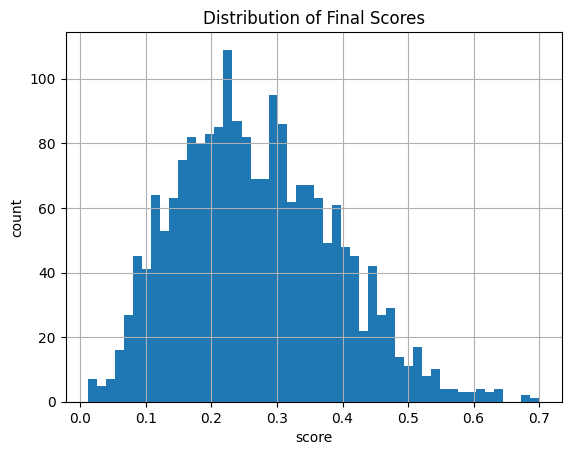

In [ ]:
import matplotlib.pyplot as plt

feat['final_score'].hist(bins=50)
plt.title('Distribution of Final Scores'); plt.xlabel('score'); plt.ylabel('count')
plt.show()


### 6.(if) if we use pyod

In [ ]:
!pip install -U pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
#  PyOD End-to-End Scoring Pipeline for IRA
#  UCLA Capstone – Anomaly Detection

import os, joblib, numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.copod import COPOD
from pyod.models.cblof import CBLOF

# parameter
DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
IN_FILE = 'ira_features_rules.parquet' # rule_score included
OUT_FILE = 'ira_scored_pyod.parquet'
MODEL_DIR = os.path.join(DATA_DIR, 'models')
os.makedirs(MODEL_DIR, exist_ok=True)

# weight as before
ALPHA = 0.6
BETA = 0.4
CONTAM = 0.02

# read csv file
feat = pd.read_parquet(os.path.join(DATA_DIR, IN_FILE))

num_cols = [
    'amount_z','days_since_prev','rolling_mean_3','rolling_std_3',
    'dup_amt_cnt','txn_cnt','neg_ratio','avg_days_between',
    'active_months','max_abs_amt'
]
X_raw = feat[num_cols].fillna(0).values
scaler = StandardScaler().fit(X_raw)
X = scaler.transform(X_raw)

# define the model

ae_model = AutoEncoder(
    contamination=0.02,
    hidden_neuron_list=[32, 16, 32],
    epoch_num=30,
    batch_size=32,
    random_state=42
)
MODELS = {
    'iforest' : IForest   (contamination=CONTAM, n_estimators=200, random_state=42),
    'lof' : LOF       (contamination=CONTAM, n_neighbors=20),
    'ae' : ae_model,
    'copod' : COPOD     (contamination=CONTAM),
    'cblof' : CBLOF     (contamination=CONTAM, n_clusters=10, random_state=42)
}

scores = {}
for name, clf in MODELS.items():
    pipe = Pipeline([('model', clf)])
    pipe.fit(X)
    raw = pipe['model'].decision_scores_
    scores[name] = (raw - raw.min()) / (raw.max() - raw.min())  # normalization 0-1
    joblib.dump(pipe, os.path.join(MODEL_DIR, f'{name}.pkl'))
    print(f'{name:<8s}  mean={scores[name].mean():.3f}')

# Simple average fusion
feat['model_score'] = pd.DataFrame(scores).mean(axis=1)

# Integration rules section
feat['final_score'] = ALPHA*feat['model_score'] + BETA*feat['rule_score']

def map_label(s):
    if s >= 0.95: return 'FRAUDULENT'
    if s >= 0.90: return 'HIGH_RISK'
    if s >= 0.80: return 'UNUSUAL'
    return 'NORMAL'
feat['label'] = feat['final_score'].apply(map_label)

# output
out_path = os.path.join(DATA_DIR, OUT_FILE)
feat.to_parquet(out_path, index=False)
print('Scoring complete saved to', out_path)
print('\nLabel distribution:\n', feat['label'].value_counts())


iforest   mean=0.357
lof       mean=0.006


Training: 100%|██████████| 30/30 [00:17<00:00,  1.74it/s]


ae        mean=0.045
copod     mean=0.294
cblof     mean=0.045
Scoring complete saved to /content/drive/MyDrive/ucla_capstone/ira_scored_pyod.parquet

Label distribution:
 label
NORMAL    2000
Name: count, dtype: int64


## 7. Overall score & Grading calibration

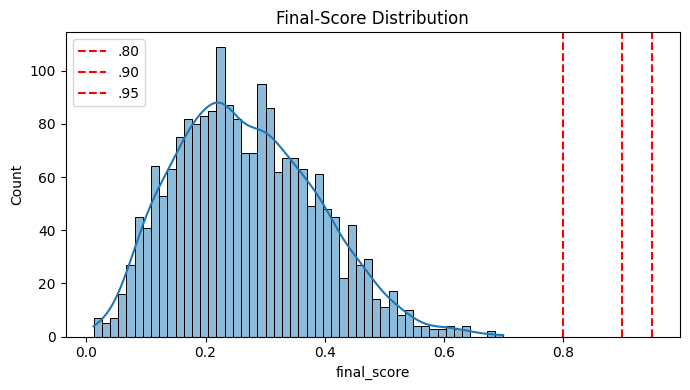

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
df = pd.read_parquet(os.path.join(DATA_DIR, 'ira_scored.parquet'))

plt.figure(figsize=(7,4))
sns.histplot(df['final_score'], bins=50, kde=True)
plt.axvline(0.80, color='r', ls='--', label='.80')
plt.axvline(0.90, color='r', ls='--', label='.90')
plt.axvline(0.95, color='r', ls='--', label='.95')
plt.title('Final-Score Distribution'); plt.legend(); plt.tight_layout(); plt.show()


The visualization presented by the above code may not be reliable as it classifies all transactions as "normal". Instead, let's directly divide the calculated scores into percentages, which might be more informative.

上面代码所展现出来的可视化可能不具备参考性，会把所有交易判断成normal，下面直接对计算后的分数进行百分比的切分，可能更具参考性

In [ ]:
import numpy as np, pandas as pd, os

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
df = pd.read_parquet(os.path.join(DATA_DIR, 'ira_scored.parquet'))

# Calculate the critical quantile point
q90, q95, q97, q99 = np.percentile(df['final_score'], [90, 95, 97, 99])
print(f'P90={q90:.3f}  P95={q95:.3f}  P97={q97:.3f}  P99={q99:.3f}')

# Map labels using quantile mapping
def map_label(s):
    if s >= q99:            # ~1 %
        return 'FRAUDULENT'
    if s >= q97:            # 2–3 %
        return 'HIGH_RISK'
    if s >= q90:            # ~10 %
        return 'UNUSUAL'
    return 'NORMAL'

df['label'] = df['final_score'].apply(map_label)

# distribution preview
print('\nNew label distribution:\n', df['label'].value_counts(normalize=True).apply(lambda x: f'{x*100:.2f}%'))

# save the new output
df.to_parquet(os.path.join(DATA_DIR,'ira_scored_calibrated.parquet'), index=False)
print('Saved calibrated file.')


P90=0.429  P95=0.473  P97=0.509  P99=0.575

New label distribution:
 label
NORMAL        90.00%
UNUSUAL        7.00%
HIGH_RISK      2.00%
FRAUDULENT     1.00%
Name: proportion, dtype: object
Saved calibrated file.


**visualization**

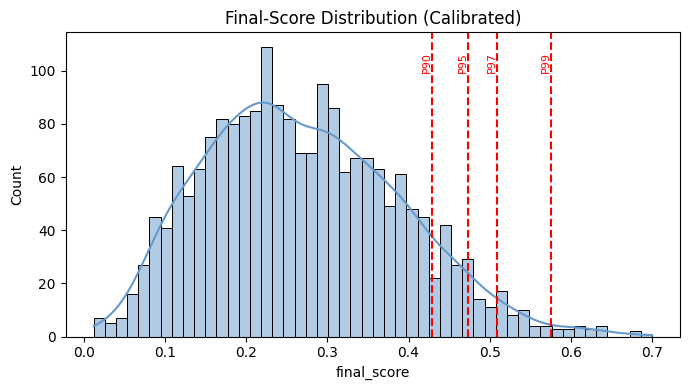

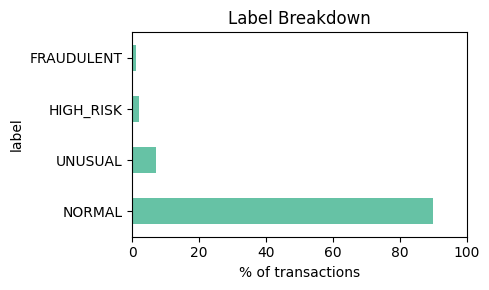

In [ ]:
import os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
df = pd.read_parquet(os.path.join(DATA_DIR, 'ira_scored_calibrated.parquet'))

q90, q95, q97, q99 = np.percentile(df['final_score'], [90, 95, 97, 99])

# Distribution histogram
plt.figure(figsize=(7,4))
sns.histplot(df['final_score'], bins=50, kde=True, color='#6699cc')

for q, lbl in zip([q90, q95, q97, q99], ['P90','P95','P97','P99']):
    plt.axvline(q, ls='--', lw=1.5, color='red')
    plt.text(q, plt.ylim()[1]*0.9, lbl, rotation=90, color='red',
             ha='right', va='center', fontsize=8)

plt.title('Final-Score Distribution (Calibrated)')
plt.xlabel('final_score'); plt.ylabel('Count')
plt.tight_layout(); plt.show()

# Bar chart of label proportion
plt.figure(figsize=(5,3))
(df['label']
   .value_counts(normalize=True)
   .loc[['NORMAL','UNUSUAL','HIGH_RISK','FRAUDULENT']]
   .mul(100).plot(kind='barh', color='#66c2a5'))
plt.xlabel('% of transactions'); plt.title('Label Breakdown')
plt.xlim(0, 100); plt.tight_layout(); plt.show()


In [ ]:
# review sample
sample = (df.groupby('label')
            .apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))
            .reset_index(drop=True))

sample_cols = ['accountId','transactionId','amount','type',
               'final_score','rule_score','model_score','label']
sample[sample_cols].to_csv(os.path.join(DATA_DIR,'ira_sample_review.csv'), index=False)
print('Review sample saved to ira_sample_review.csv')


Review sample saved to ira_sample_review.csv


/tmp/ipython-input-1329210643.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(10, len(x)), random_state=42))


## 8. Explainability Layer

In [ ]:
!pip install shap -q

In [ ]:
import pandas as pd, joblib, os, numpy as np, shap, matplotlib.pyplot as plt

DATA_DIR = '/content/drive/MyDrive/ucla_capstone'
df = pd.read_parquet(os.path.join(DATA_DIR, 'ira_scored.parquet'))
pipe = joblib.load(os.path.join(DATA_DIR, 'ira_iforest.pkl'))  # pipeline
num_cols = [
    'amount_z','days_since_prev','rolling_mean_3','rolling_std_3',
    'dup_amt_cnt','txn_cnt','neg_ratio','avg_days_between',
    'active_months','max_abs_amt'
]

# Take the top 500 high-scoring results for explanation
top_idx = df['final_score'].nlargest(500).index
X_top = df.loc[top_idx, num_cols].fillna(0)
X_top_scaled = pipe['scaler'].transform(X_top)


/tmp/ipython-input-2782975468.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_top, feature_names=num_cols, show=False)


SHAP image saved to shap_summary_iforest.png


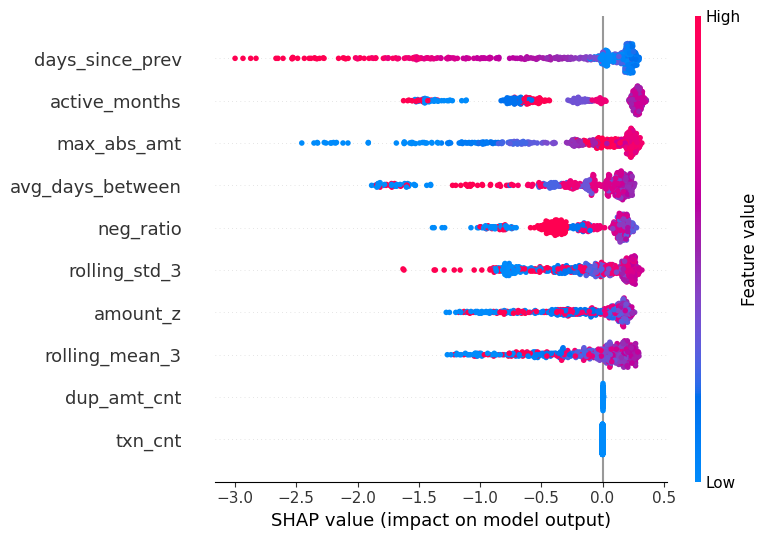

In [ ]:
explainer = shap.TreeExplainer(pipe['iforest'])
shap_values = explainer.shap_values(X_top_scaled)

# summary plot
shap.summary_plot(shap_values, X_top, feature_names=num_cols, show=False)
plt.tight_layout(); plt.savefig(os.path.join(DATA_DIR,'shap_summary_iforest.png'))
print('SHAP image saved to shap_summary_iforest.png')


In [ ]:
'''
rule_cols = [c for c in df.columns if c.startswith('R')]
df['rules_hit'] = df[rule_cols].apply(lambda r: [c for c in rule_cols if r[c]==1], axis=1)

explain_df = df.loc[top_idx, ['accountId','transactionId','amount','type',
                              'final_score','model_score','rule_score','rules_hit']]
explain_df.to_csv(os.path.join(DATA_DIR,'ira_explain_iforest_top500.csv'), index=False)
print('Explanation CSV saved to ira_explain_iforest_top500.csv')
'''

Explanation CSV saved to ira_explain_iforest_top500.csv


In [ ]:
'''
# ==== 1) Imports & paths ====
import os, joblib, numpy as np, pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# 改成你的项目路径
DATA_DIR   = '/content/drive/MyDrive/ucla_capstone'
MODELS_DIR = os.path.join(DATA_DIR, 'models')
os.makedirs(MODELS_DIR, exist_ok=True)

# 优先用带规则分的特征；没有就退回基础特征
CANDIDATES = ['ira_features_rules.parquet', 'ira_features.parquet']
for name in CANDIDATES:
    path = os.path.join(DATA_DIR, name)
    if os.path.exists(path):
        df = pd.read_parquet(path)
        src_name = name
        break
else:
    raise FileNotFoundError('找不到 ira_features_rules.parquet 或 ira_features.parquet')

print(f'Loaded {src_name}  ->  shape={df.shape}')

# ==== 2) 训练时的特征列（与前端一致；会跟现有列取交集）====
num_cols_default = [
    'amount_z','days_since_prev','days_until_next',
    'rolling_mean_3','rolling_std_3','dup_amt_cnt',
    'txn_cnt','neg_ratio','avg_days_between','active_months','max_abs_amt'
]
num_cols = [c for c in num_cols_default if c in df.columns]
if not num_cols:
    raise RuntimeError('特征列一个都没匹配上；请先按 Step4/5 生成 IRA 特征文件。')

print('Using num_cols:', num_cols)

# 用 DataFrame 拟合，scaler 会记录 feature_names_in_
X = df[num_cols].fillna(0)

# ==== 3) 训练 Isolation Forest Pipeline ====
CONTAM = 0.02   # IRA 经验异常率
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('iforest', IsolationForest(n_estimators=200, contamination=CONTAM, random_state=42))
])
pipe.fit(X)

# ==== 4) 在训练分布上做一次阈值校准（供前端默认使用）====
raw  = pipe['iforest'].decision_function(pipe['scaler'].transform(X))
mscore = (-raw - (-raw).min()) / ((-raw).max() - (-raw).min() + 1e-12)

# 如果特征表里已有 rule_score，就做 0.6/0.4 融合；否则只用模型分
if 'rule_score' in df.columns:
    ALPHA, BETA = 0.6, 0.4
    final = ALPHA*mscore + BETA*df['rule_score'].values
else:
    ALPHA, BETA = 1.0, 0.0
    final = mscore

p90, p97, p99 = np.percentile(final, [90, 97, 99])
print(f'Calibrated cuts: P90={p90:.4f}  P97={p97:.4f}  P99={p99:.4f}')

# ==== 5) 保存到 models/ ====
pipe_path = os.path.join(MODELS_DIR, 'ira_iforest.pkl')
meta_path = os.path.join(MODELS_DIR, 'ira_feature_meta.pkl')

joblib.dump(pipe, pipe_path)
meta = {
    'num_cols': num_cols,
    'alpha_beta': (float(ALPHA), float(BETA)),
    'pct_cut': (float(p90), float(p97), float(p99))
}
joblib.dump(meta, meta_path)

print('✅ Saved:', pipe_path)
print('✅ Saved:', meta_path)

# 小自检：确认是 Pipeline + 有 scaler + 特征数
pp = joblib.load(pipe_path)
print('Pipeline?', isinstance(pp, Pipeline), 'Steps:', list(pp.named_steps.keys()))
print('Scaler n_features_in_ =', getattr(pp.named_steps['scaler'], 'n_features_in_', None))
print('Feature names recorded =', getattr(pp.named_steps['scaler'], 'feature_names_in_', None))
'''

Loaded ira_features_rules.parquet  ->  shape=(2000, 45)
Using num_cols: ['amount_z', 'days_since_prev', 'days_until_next', 'rolling_mean_3', 'rolling_std_3', 'dup_amt_cnt', 'txn_cnt', 'neg_ratio', 'avg_days_between', 'active_months', 'max_abs_amt']
Calibrated cuts: P90=0.3986  P97=0.4762  P99=0.5378
✅ Saved: /content/drive/MyDrive/ucla_capstone/models/ira_iforest.pkl
✅ Saved: /content/drive/MyDrive/ucla_capstone/models/ira_feature_meta.pkl
Pipeline? True Steps: ['scaler', 'iforest']
Scaler n_features_in_ = 11
Feature names recorded = ['amount_z' 'days_since_prev' 'days_until_next' 'rolling_mean_3'
 'rolling_std_3' 'dup_amt_cnt' 'txn_cnt' 'neg_ratio' 'avg_days_between'
 'active_months' 'max_abs_amt']
